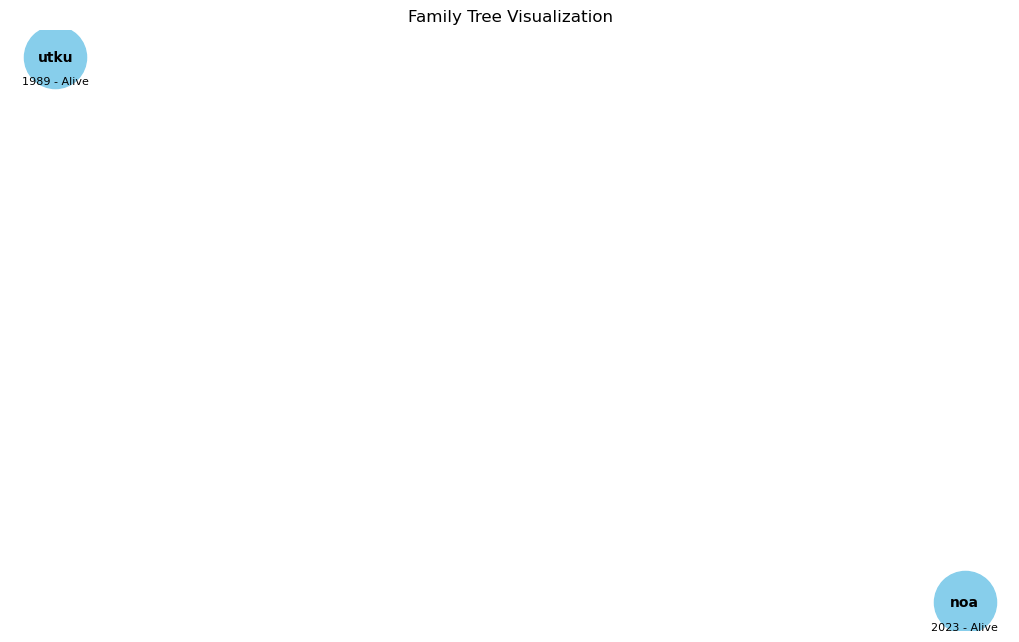

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

class Person:
    def __init__(self, name, birth_year, death_year=None):
        self.name = name
        self.birth_year = birth_year
        self.death_year = death_year
        self.children = []

    def add_child(self, child):
        self.children.append(child)

    def __str__(self):
        return f"{self.name} ({self.birth_year} - {self.death_year if self.death_year else 'Alive'})"

def create_person():
    name = input("Enter name: ")
    birth_year = int(input(f"Enter birth year of {name}: "))
    death_year = input(f"Enter death year of {name} (Leave blank if alive): ")
    
    if death_year:
        death_year = int(death_year)
    else:
        death_year = None
    
    return Person(name, birth_year, death_year)

def add_relationships(persons):
    while True:
        parent_name = input("Enter parent name (or type 'done' to finish): ")
        if parent_name == 'done':
            break
        
        child_name = input(f"Enter child name for {parent_name}: ")
        
        # Find or create parent and child
        parent = next((p for p in persons if p.name == parent_name), None)
        if not parent:
            print(f"Parent {parent_name} does not exist. Creating it.")
            parent = create_person()
            persons.append(parent)
        
        child = next((p for p in persons if p.name == child_name), None)
        if not child:
            print(f"Child {child_name} does not exist. Creating it.")
            child = create_person()
            persons.append(child)
        
        parent.add_child(child)

def visualize_family_tree(persons):
    G = nx.DiGraph()  # Directed graph to show parent-child relationships

    # Add nodes for each person
    for person in persons:
        G.add_node(person.name, birth_year=person.birth_year, death_year=person.death_year)

    # Add edges (parent-child relationships)
    for person in persons:
        for child in person.children:
            G.add_edge(person.name, child.name)

    # Draw the graph
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

    # Draw nodes with labels
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")

    # Label nodes with birth/death years
    for person in persons:
        plt.text(pos[person.name][0], pos[person.name][1] - 0.1, f"{person.birth_year} - {person.death_year if person.death_year else 'Alive'}",
                 horizontalalignment='center', fontsize=8)

    plt.title("Family Tree Visualization")
    plt.show()

def main():
    persons = []
    
    # Allow user to create persons
    while True:
        create_another = input("Would you like to create a person? (yes/no): ")
        if create_another.lower() == 'yes':
            person = create_person()
            persons.append(person)
        else:
            break

    # Allow user to add relationships
    add_relationships(persons)
    
    # Visualize the family tree
    visualize_family_tree(persons)

if __name__ == "__main__":
    main()
